In [219]:
import os 
os.chdir('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from config import *
from utilities import calculate_amounts_agg



In [254]:
token_transfers_df = pd.read_csv(CURVE_TOKEN_TRANSFERS_FILENAME)

pool_add_liquidity_df = pd.read_csv(CURVE_POOL_ADDLIQUIDITY_FILENAME)
pool_remove_liquidity_df = pd.read_csv(CURVE_POOL_REMOVELIQUIDITY_FILENAME)
pool_remove_liquidity_one_df = pd.read_csv(CURVE_POOL_REMOVELIQUIDITYONE_FILENAME)
pool_remove_liquidity_imbalance_df = pd.read_csv(CURVE_POOL_REMOVELIQUIDITYIMBALANCE_FILENAME)
pool_token_exchange_swaps_df = pd.read_csv(CURVE_POOL_TOKENSWAPS_FILENAME)

## Preprocessing

In [255]:
pool_add_liquidity_df['block_date'] = pd.to_datetime(pool_add_liquidity_df['block_date'])
pool_add_liquidity_df['date'] = pd.to_datetime(pool_add_liquidity_df['block_date']).dt.date

pool_add_liquidity_df['token_amounts_a'] = pool_add_liquidity_df['token_amounts_a'].astype(float)/1e18
pool_add_liquidity_df['token_amounts_b'] = pool_add_liquidity_df['token_amounts_b'].astype(float)/1e18
pool_add_liquidity_df['invariant'] = pool_add_liquidity_df['invariant'].astype(float)/1e18

pool_add_liquidity_df['token_amounts'] = pool_add_liquidity_df.apply(
    lambda row: calculate_amounts_agg(row, 'token_amounts_a', 'token_amounts_b'), axis=1)
pool_add_liquidity_df['fee_amounts'] = pool_add_liquidity_df.apply(
    lambda row: calculate_amounts_agg(row, 'fees_a', 'fees_b'), axis=1)

pool_remove_liquidity_df['block_date'] = pd.to_datetime(pool_remove_liquidity_df['block_date'])
pool_remove_liquidity_df['date'] = pd.to_datetime(pool_remove_liquidity_df['block_date']).dt.date

pool_remove_liquidity_df['token_amounts_a'] = pool_remove_liquidity_df['token_amounts_a'].astype(float)/1e18
pool_remove_liquidity_df['token_amounts_b'] = pool_remove_liquidity_df['token_amounts_b'].astype(float)/1e18


pool_remove_liquidity_df['token_amounts'] = pool_remove_liquidity_df.apply(
    lambda row: calculate_amounts_agg(row, 'token_amounts_a', 'token_amounts_b'), axis=1)
pool_remove_liquidity_df['fee_amounts'] = pool_remove_liquidity_df.apply(
    lambda row: calculate_amounts_agg(row, 'fees_a', 'fees_b'), axis=1)

pool_remove_liquidity_imbalance_df['invariant'] = pool_remove_liquidity_imbalance_df['invariant'].astype(float)/1e18

pool_token_exchange_swaps_df['block_date'] = pd.to_datetime(pool_token_exchange_swaps_df['block_date'])
pool_token_exchange_swaps_df['date'] = pd.to_datetime(pool_token_exchange_swaps_df['block_date']).dt.date
pool_token_exchange_swaps_df['tokens_sold'] = pool_token_exchange_swaps_df['tokens_sold'].astype(float)/1e18
pool_token_exchange_swaps_df['tokens_bought'] = pool_token_exchange_swaps_df['tokens_bought'].astype(float)/1e18


In [252]:
pool_token_exchange_swaps_df.groupby('bought_id').count()
pool_add_liquidity_df.sample(10)

,provider,token_amounts_a,token_amounts_b,fees_a,fees_b,invariant,token_supply,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,block_date,token_amounts,fee_amounts
199,0xF2618760e8331bddCd4B16A5dDE5B3967023095d,0.000000,0.784816,19601605661074,19602783156747,128849.177464,119202255792697390355516,AddLiquidity,231,72,0x9514139a92420b6922ac8bdb48d258449b52c0caebf2...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x40a8bdb1ff99e7bbf5b7040c1e218c740680ee023b6e...,18241530,2023-09-29 13:00:23,0.784816,19602783156747
473,0xB662Cb3F0F8EdaF30088494691fE007faD3a0F3B,5.900000,0.000000,147865626726676,147889822278750,120343.334812,111179091136636716191837,AddLiquidity,659,221,0x5478194400213fa00232d530ac5f814b0f199af398ea...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x95c4a22b585e622ddd4e912bffe6641a9576c42bec31...,18441488,2023-10-27 12:17:11,5.900000,147889822278750
571,0x271fbE8aB7f1fB262f81C77Ea5303F03DA9d3d6A,1.681065,1.700169,0,0,105691.798750,97437854058614400079091,AddLiquidity,257,97,0xa66d3087124b2e87ea7b07ccbdcfa9550bd8ed247c19...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x629f139adccca2cee926906ea5ba10ba821d246c768c...,18715330,2023-12-04 20:17:11,1.700169,0
457,0xb634316E06cC0B358437CbadD4dC94F1D3a92B3b,0.000000,1.657369,41180162924467,41195971465858,121035.265385,111837759490143856934098,AddLiquidity,157,15,0x375a23e7799505c60a5ad06be080982a73fad0c8ccf4...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x787eb261d47c61f0430459bf7b595767c512207f45b2...,18414070,2023-10-23 16:10:11,1.657369,41195971465858
342,0x652D3DA2Fc872a370f35eaee13c9eD238519D475,0.000000,0.002000,49813659315,49825266473,126978.533659,117407474276181172713746,AddLiquidity,167,72,0x167f9ffe182d105161a6defd3d95f90dc2f482fe8250...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x011b03ec28c6d905fb0f4a0afb205b1a543cf8a55cdc...,18325329,2023-10-11 06:10:11,0.002000,49825266473
94,0x43A996fa50d2f378d707aCA9dDCDE1C30CB68f63,0.002000,0.000000,50318067257,50339412905,159108.507625,147299760169517982219304,AddLiquidity,317,108,0xe9f564b3b138a11a57998ab3b6f61b0894d19a1be672...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x05d48d61c4599a8d77df9978df1ed9346133095c50b3...,18146041,2023-09-16 03:26:47,0.002000,50339412905
151,0xdfCB9645D8EAD890A92Ca255f38C7a5896E80dBB,0.000100,0.000100,15144860,15147820,158534.752193,146709728701073959168165,AddLiquidity,73,11,0xf7eee1a6c2fd9275033e814ed313f250cffec9b26c2f...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x148b07142229ddeb9e5ee66563d076b1f3cc30824423...,18203331,2023-09-24 04:38:59,0.000100,15147820
247,0x7d873FbFE8e16f5F55740a52a356c2f52c613cdF,0.358625,0.360000,0,0,128120.171365,118503535650680637471398,AddLiquidity,207,84,0xff8661c3ccd82f5959b70d62ffc7fd2e8928c72a2771...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x0a19801e7bca3982a27258a978734ff84fe27cc2896c...,18272316,2023-10-03 20:14:23,0.360000,0
172,0xdB864FB636eA37B61D02229AebaC8b0679760BD2,0.000582,0.000000,14579933049,14582359395,157377.687006,145616802757239933482675,AddLiquidity,80,1,0x5971a05df1538097e4d03caa39aadae3a06dd49d4178...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x3e63b657e295d7bceb45d229941d37d1bb8c5b382e73...,18226782,2023-09-27 11:25:35,0.000582,14582359395
246,0x682bA005aF4276749A26Dc18400b395DaC408191,76.799952,0.000000,1924689333939388,1924964267579373,128119.454665,118502870965404393125291,AddLiquidity,197,93,0x13c03032a0d57844389d97369a694bd4498991b00c85...,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,0x224c7c27eb0fbd0279564146bd8b22470ba8bc225680...,18272195,2023-10-03 19:49:59,76.799952,1924964267579373


In [247]:
pool_add_liquidity_df.shape[0], pool_remove_liquidity_df.shape[0], pool_remove_liquidity_one_df.shape[0], pool_remove_liquidity_imbalance_df.shape[0], pool_token_exchange_swaps_df.shape[0],token_transfers_df.shape[0]

(580, 177, 707, 13, 6824, 4964)

In [246]:
hash_tx = '0x31fe17f44e8adebf82d3aa70151'
df = pool_token_exchange_swaps_df
token_transfers_df.head()
df[df.transactionHash.str.contains(hash_tx)]
#pool_remove_liquidity_df.sort_values('fees_b',ascending=False)

,buyer,sold_id,tokens_sold,bought_id,tokens_bought,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber


# Volume

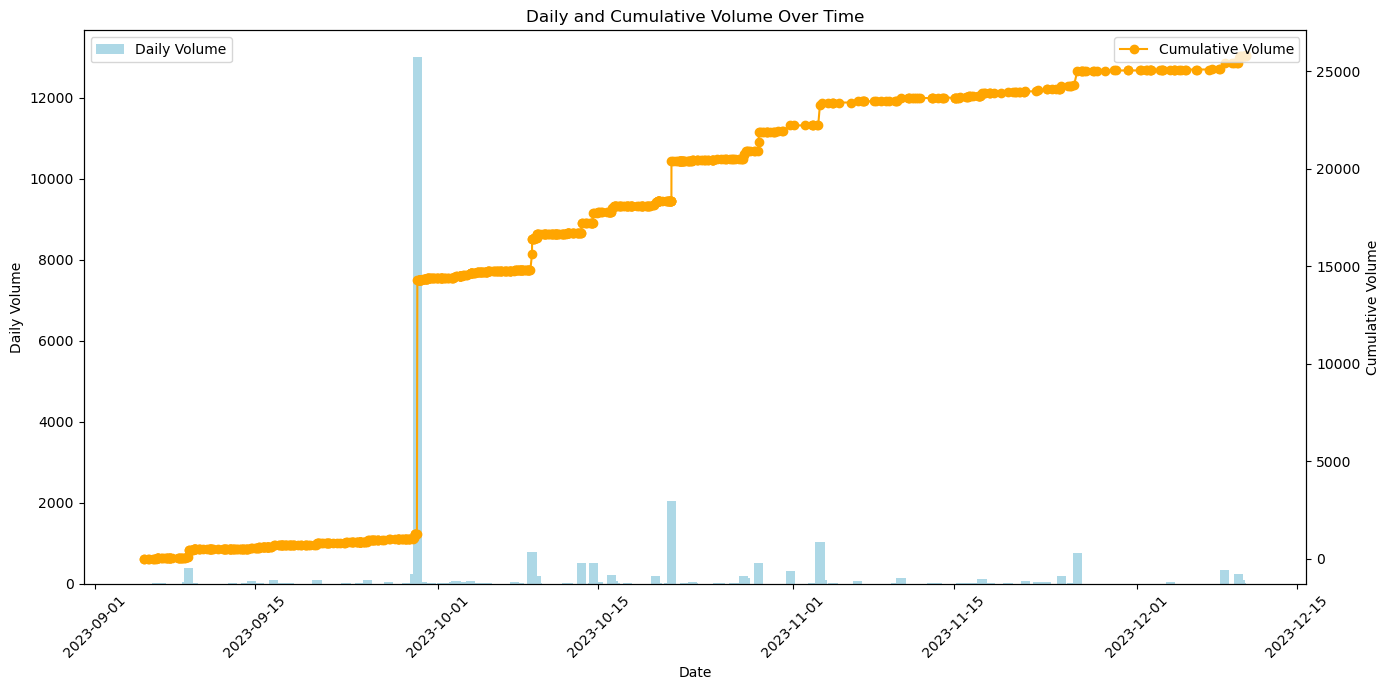

In [171]:
volume_df = pd.concat([
    pool_remove_liquidity_df[['block_date', 'token_amounts']],
    pool_add_liquidity_df[['block_date', 'token_amounts']]
])

daily_volume = volume_df.groupby('block_date')['token_amounts'].sum()

cumulative_volume = daily_volume.cumsum()

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.bar(daily_volume.index, daily_volume.values, color='lightblue', label='Daily Volume')
ax1.set_ylabel('Daily Volume')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2.plot(cumulative_volume.index, cumulative_volume.values, color='orange', marker='o', label='Cumulative Volume')
ax2.set_ylabel('Cumulative Volume')

ax1.set_title('Daily and Cumulative Volume Over Time')
ax1.tick_params(axis='x', rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Fees

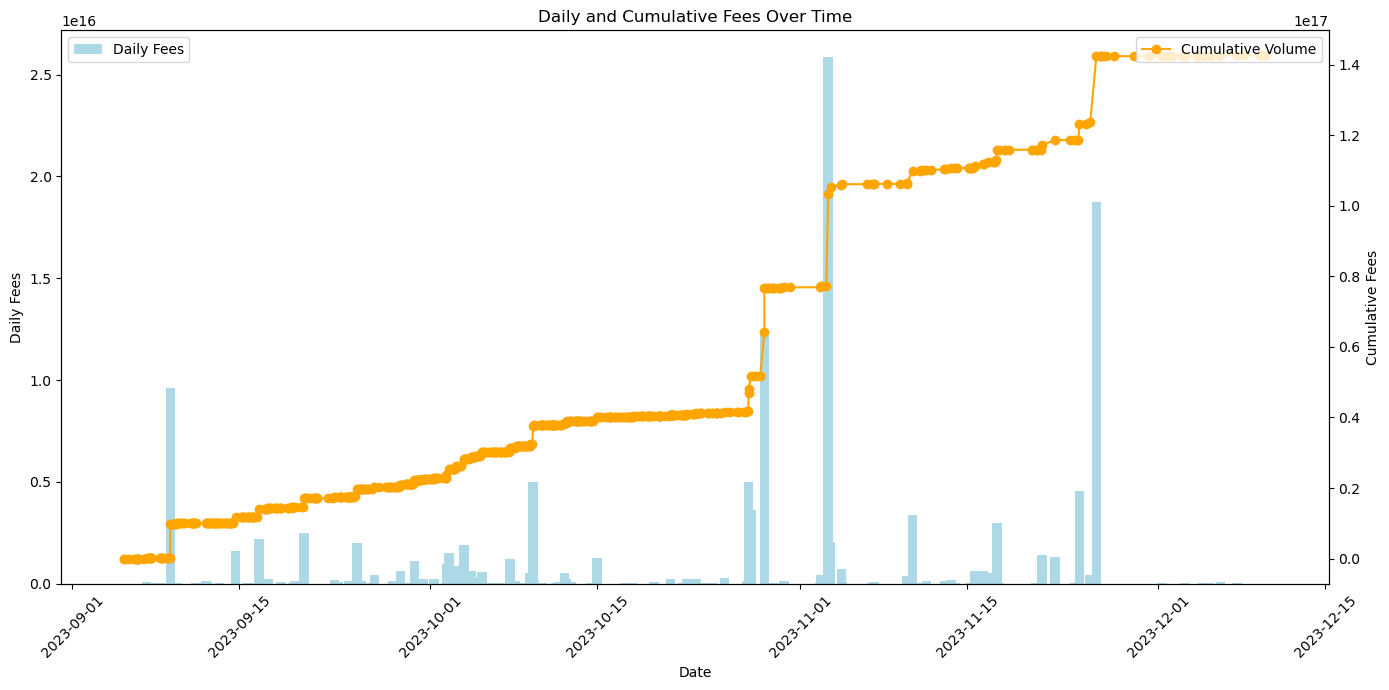

In [179]:
daily_fees = pool_add_liquidity_df.groupby('block_date')['fee_amounts'].sum()

cumulative_fees = daily_fees.cumsum()

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.bar(daily_fees.index, daily_fees.values, color='lightblue', label='Daily Fees')
ax1.set_ylabel('Daily Fees')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()

ax2.plot(cumulative_fees.index, cumulative_fees.values, color='orange', marker='o', label='Cumulative Volume')
ax2.set_ylabel('Cumulative Fees')

ax1.set_title('Daily and Cumulative Fees Over Time')
ax1.tick_params(axis='x', rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Volatility

In [221]:
pool_token_exchange_swaps_df['price'] = pool_token_exchange_swaps_df['tokens_sold'] \
                                        / pool_token_exchange_swaps_df['tokens_bought']
daily_prices = pool_token_exchange_swaps_df.groupby('date')[['price']].mean()
daily_prices['rolling_volatility'] = daily_prices['price'].rolling(window=5).std()

In [222]:
daily_prices

,price,rolling_volatility
date,,
2023-09-05,1.000256,NaN
2023-09-06,1.000195,NaN
2023-09-07,1.000182,NaN
2023-09-08,1.000194,NaN
2023-09-09,1.000082,0.000063
...,...,...
2023-12-06,1.000080,NaN
2023-12-07,1.000192,NaN
2023-12-08,1.000151,NaN


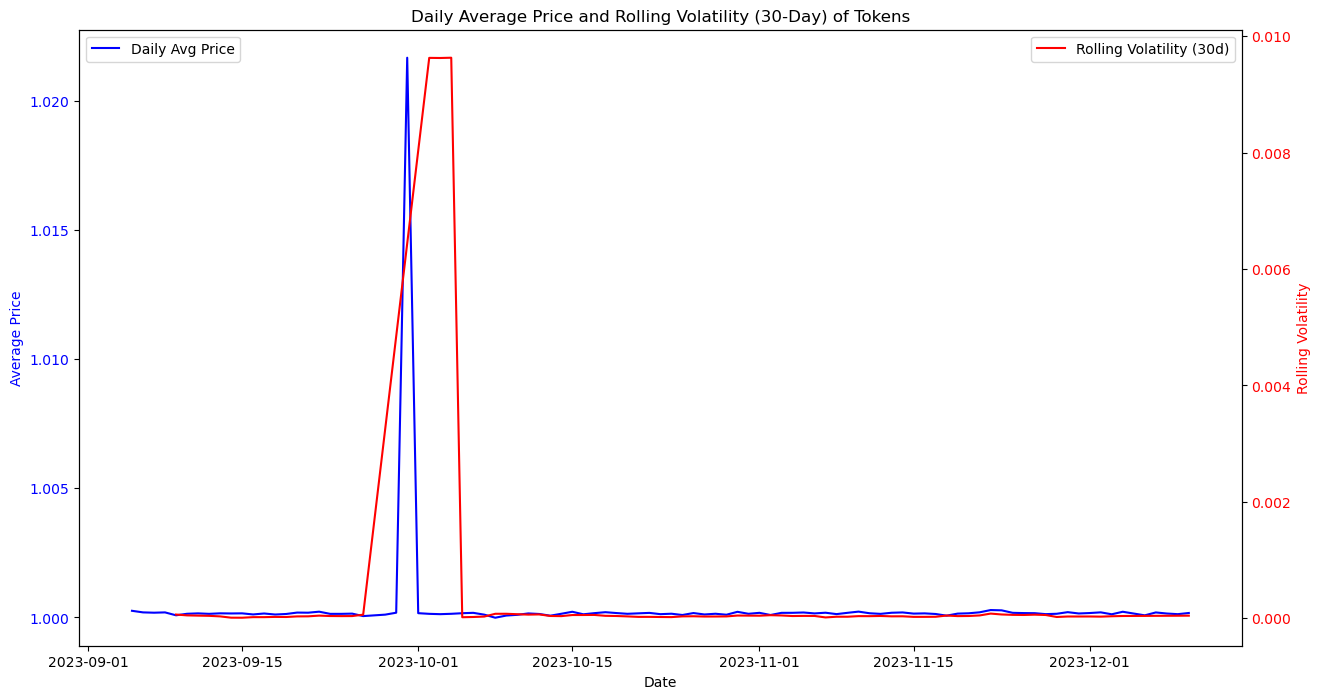

In [223]:
fig, ax1 = plt.subplots(figsize=(15, 8))

sns.lineplot(x=daily_prices.index, y='price', data=daily_prices, ax=ax1, label='Daily Avg Price', color='blue')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax2 = ax1.twinx()
sns.lineplot(x=daily_prices.index, y='rolling_volatility', data=daily_prices, ax=ax2, label='Rolling Volatility (30d)', color='red')
ax2.set_ylabel('Rolling Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Daily Average Price and Rolling Volatility (30-Day) of Tokens')

plt.show()

# TVL

In [274]:
daily_deposits = pool_add_liquidity_df.groupby('date')['token_amounts'].sum()
daily_withdrawals = pool_remove_liquidity_df.groupby('date')['token_amounts'].sum()

daily_net_flow = daily_deposits.subtract(daily_withdrawals, fill_value=0)

# Cumulative sum of the daily net flow to get TVL
daily_tvl = daily_net_flow.cumsum()

# Create a DataFrame for plotting or further analysis
tvl_df = pd.DataFrame({
    'block_date': daily_tvl.index,
    'TVL': daily_tvl.values
})

In [266]:
daily_deposits = pool_add_liquidity_df.groupby('date')['token_amounts'].sum()
tvl_df

,block_date,TVL
0,2023-09-05,0.242000
1,2023-09-06,-13.568934
2,2023-09-07,-10.423344
3,2023-09-08,-5.670615
4,2023-09-09,406.788661
...,...,...
92,2023-12-06,-10361.068001
93,2023-12-07,-10359.593315
94,2023-12-08,-10697.363659
95,2023-12-09,-10938.693564


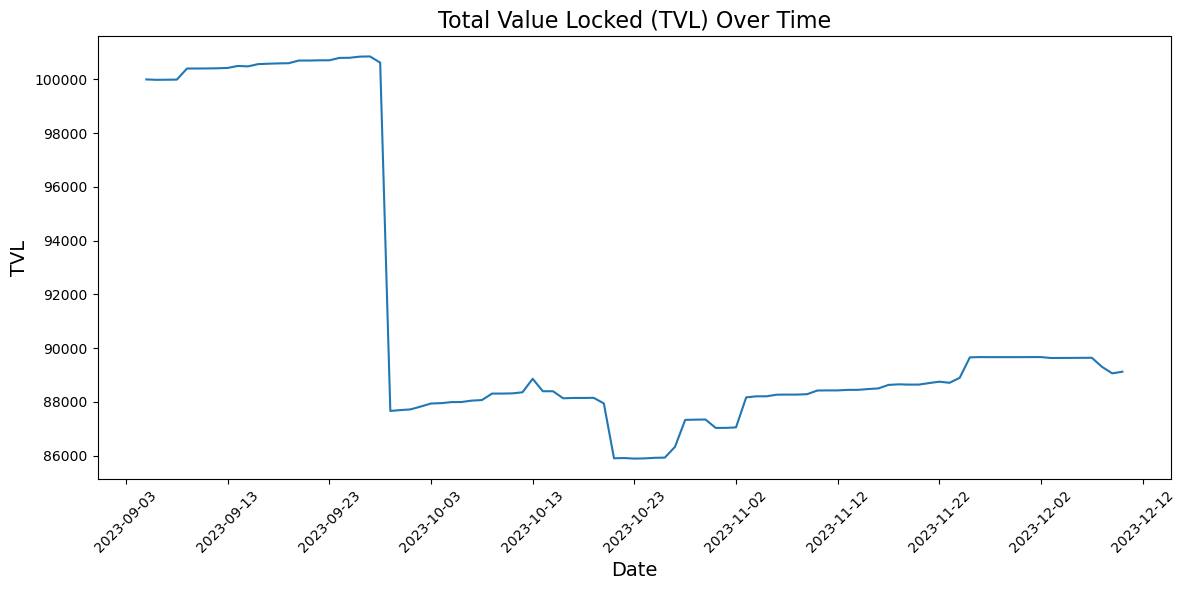

In [275]:
# As we are not starting from day 1, we add an arbitrary positive offset as start
tvl_df['TVL'] += 100000
tvl_df['block_date'] = pd.to_datetime(tvl_df['block_date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='block_date', y='TVL', data=tvl_df)

plt.title('Total Value Locked (TVL) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('TVL', fontsize=14)
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Adjust the interval as needed

plt.tight_layout()
plt.show()

# Pool Returns

By checking the information about this pool on the official Curve website from the link below:
    https://curve.fi/#/ethereum/pools/steth/deposit
        
We can see that there are different number of returns for LPs:
 
  1. **Trading Fees**: These are fees collected from every trade that occurs in the pool. In the link provided, it currently mentions a "Fee: 0.01%" which would be the trading fee rate. LPs earn a proportional share of these fees based on their stake in the pool.
  
  2.  **Rewards**: Many pools distribute additional tokens as rewards for LPs. For this pool, the dashboard shows "Rewards tAPR" for CRV tokens. This APR (Annual Percentage Rate) reflects the yearly rate of return on rewards alone, not including trading fees or other earnings.
  
  3.  **Farming Rewards**: Additional yield farming rewards may be offered, such as CVX tokens for participating in Convex Finance's platform, which further boosts Curve's CRV rewards. These tokens can often be staked or sold, providing another income stream for LPs.
  
  4.  **Base APY (Annual Percentage Yield)**: This is the annualized rate of return that takes into account the compounding of rewards. The dashboard shows both daily and weekly yields, which can be extrapolated to estimate an annual yield (though actual yield will depend on compound frequency and changes in rates over time).
  
  5. **Virtual Price**: This is an internal metric used by Curve to track the value of liquidity pool tokens (steCRV in this case) over time, effectively showing the price appreciation or depreciation of the pool token. It is normalized to start at 1.0, and any number above 1.0 indicates that the value of the pool token has increased. This can be a useful proxy for the intrinsic value gained by LP tokens due to trading fees and slippage control.
  
  
Using onchain data, it's possible to retrieve all information above, convert to corresponding dollar value and compute overall pool return for LPs for different periods. However, this is beyond the scope of this 1-day e assignment. 



## Risk adjusted returns on passive investment strategy

To compare different the return of different pools for LPs, supposing we have computed the return for each pool as explained above and naming the returns R1, R2,..., Rk for pools 1 to k, we would compute the max drawdown price of the pool's token over a period of interest, D1, D2, ..., Dk respectively. The risk adjusted returns could then be computed by dividing Rk/Dk for the pool k. We can then sort the pools by risk adjusted returns for the given period to pick the best investment.  